# Electron Density Image Analysis

This notebook is meant to make it easy to select and analyse a series of images for the movement of electron densities when varying current.

In [1]:
import numpy as np
from image_analysis_tools import *

## Data Selection

In order to follow this notebook you need three images:
1. High extraction voltage (one tight electon spot)
2. Medium extraction voltage (some spread in electrons in the image)
3. Medium with an offset (almost the same spread as the second image, but slightly changed)

Note that it is possible to analyse a series of images if desired.

All non high extraction voltage images should be names as the voltage used for extraction i.e. the difference in potential. E.g. 500.png, 400.png, 489.png.

Input the path of your folders below.

(Main can be either the path to the exact image or the path to the folder of the image (only one image in the folder is allowed).

In [2]:
# Example not functioning with current naming conventions in analysis tools
# high_extraction_directory = "D:\\OneDrive - Danmarks Tekniske Universitet\\OneDrive\\Dokumenter\\DTU\\Terahertz\\PaperExperiments\\AngleAnalysisTestImages\\main\\main.tif"
# other_images = "D:\\OneDrive - Danmarks Tekniske Universitet\\OneDrive\\Dokumenter\\DTU\\Terahertz\\PaperExperiments\\AngleAnalysisTestImages\\others"
# reduced_set = "D:\\OneDrive - Danmarks Tekniske Universitet\\OneDrive\\Dokumenter\\DTU\\Terahertz\\PaperExperiments\\AngleAnalysisTestImages\\reduced_set"

high_extraction_directory = "E:\\EmissionEnergy_Data\\Images\\centers\\08THz_emission_energy_sweep.png"
other_images = "E:\\EmissionEnergy_Data\\Images\\08THz_A_75_to_100_s5_U_1300_to_1700_s20_1\\0.0"
reduced_set = "E:\\EmissionEnergy_Data\\Images\\08THz_A_75_to_100_s5_U_1300_to_1700_s20_1\\reduced_set_angle_0"

## Create Image Series

Using the directories the images are loaded and initial analysis is performed in the form of getting the center spot

In [3]:
images = ImageSeries(high_extraction_directory, other_images) # Peak is [1152,623] for example images

Main file: 08THz_emission_energy_sweep.png, loaded
Center coordinates: [995 613]
Loaded 21 other images


In [4]:
images.subtract_background_all(images.others['1300'].data)

In [5]:
images.save_reduced_set(path=reduced_set)

Averaged images saved to folder:  E:\EmissionEnergy_Data\Images\08THz_A_75_to_100_s5_U_1300_to_1700_s20_1\reduced_set_angle_0


## Perform Analysis

The analysis aims to extract three types of information

- $\phi$ angle information (in plane angle of emission)
- $\theta$ angle information (out of plane angle of emission)
- eV (emission energy)



### Binning

For visualization of the distribution of electrons it is possible to bin the intensities. This can be done in both the linear and the logarithmic domain.

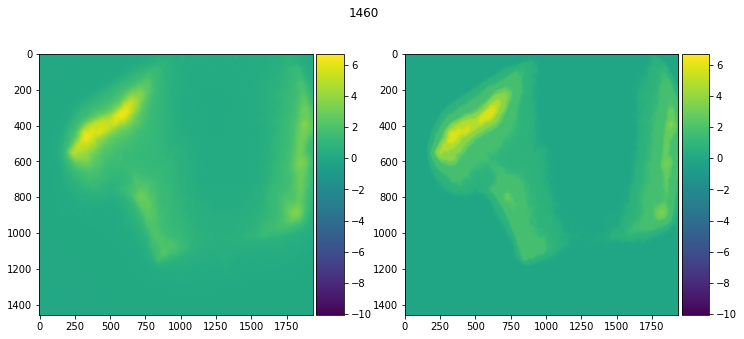

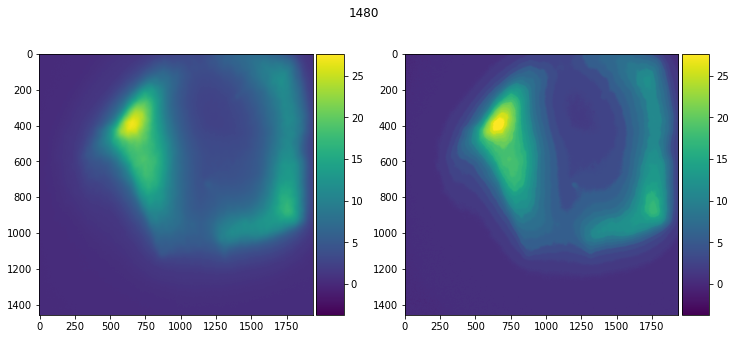

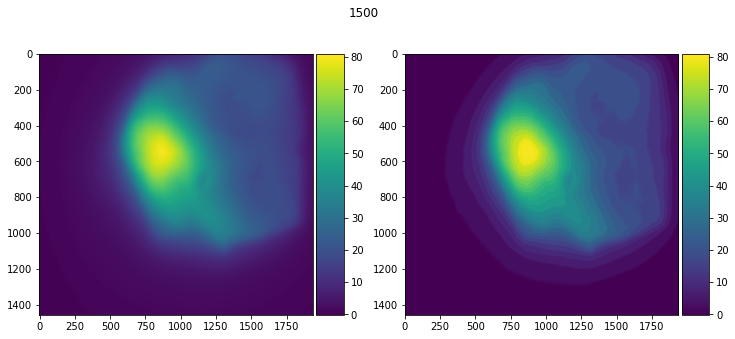

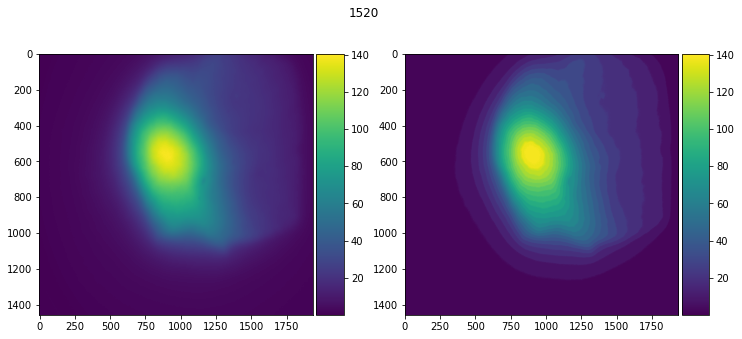

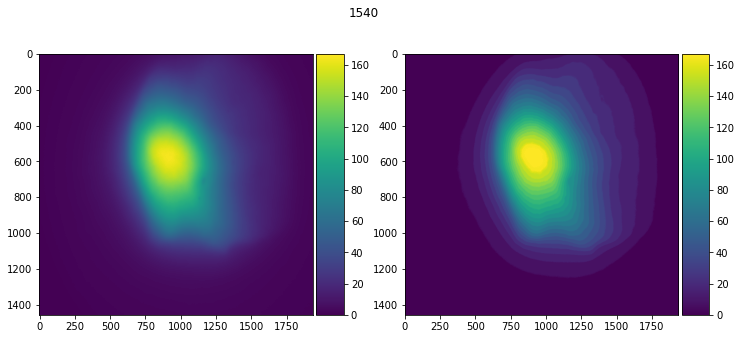

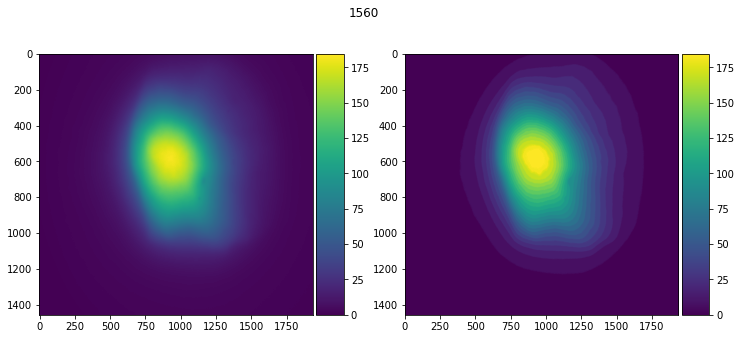

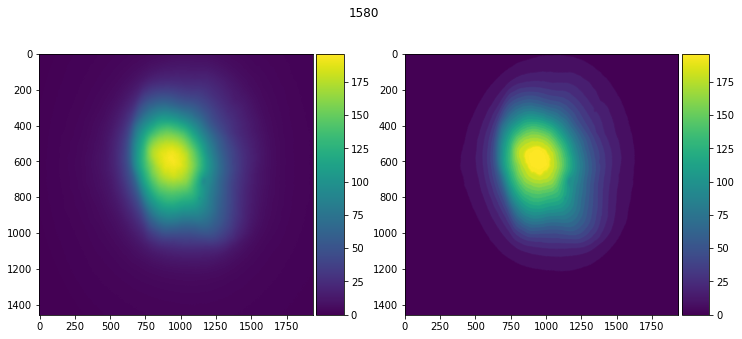

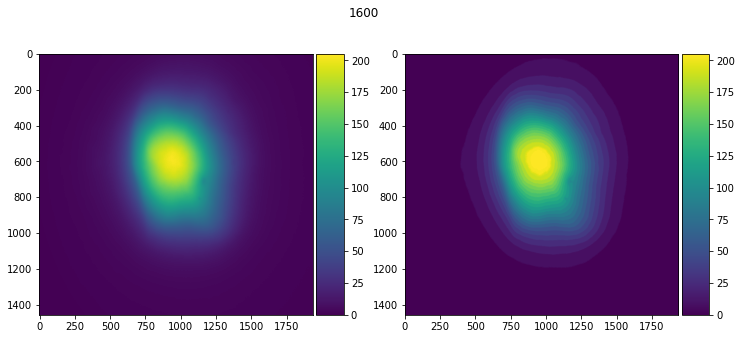

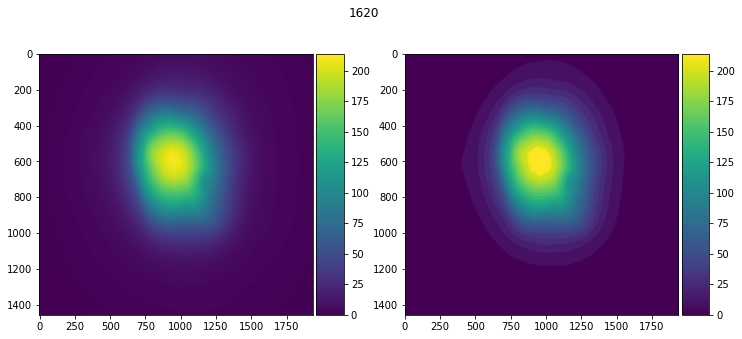

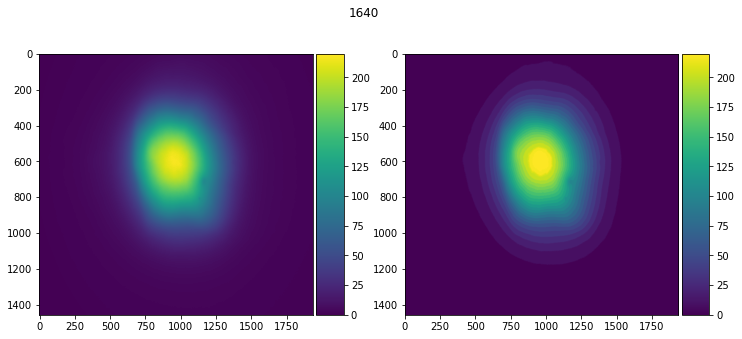

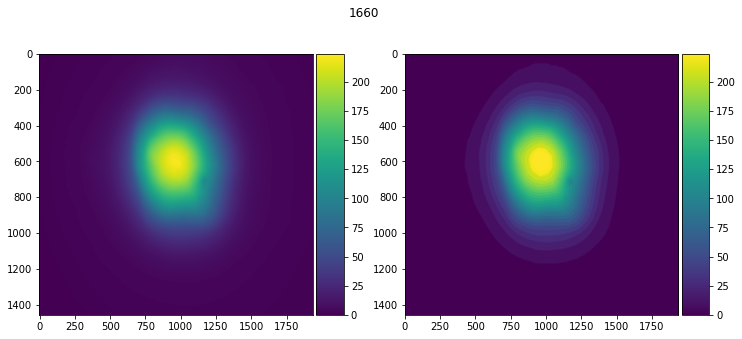

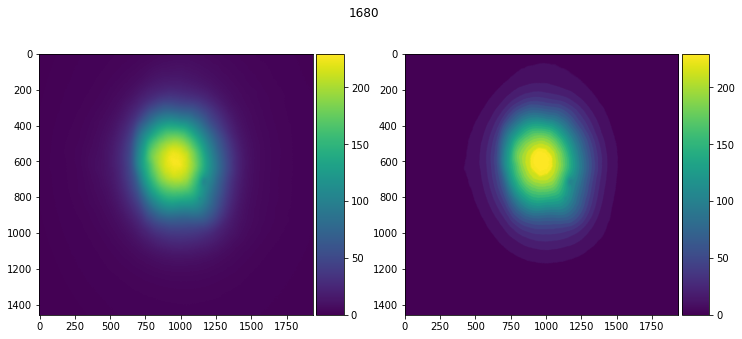

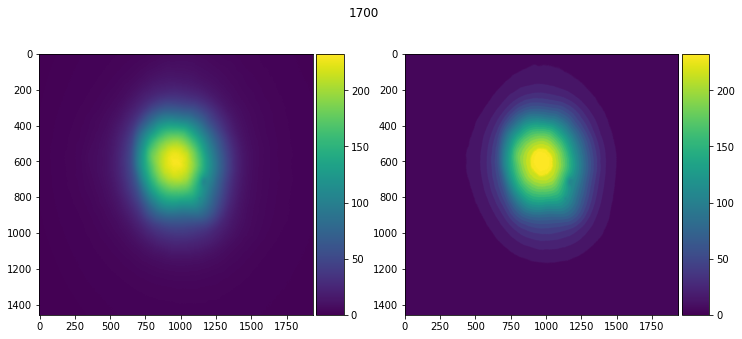

In [12]:
for i,im_name in enumerate(sorted(list(images.others))):
    if i < 8:
        continue
    im = images.others[im_name]
    im.bin_data(bins=25, domain="Linear")
    im.show_binned()

### Slicing

Before performing the analysis pixel devision and slice angle must be selected.

Slice angle is default in degrees, but can be set in radians if unit is set to it. Low angle means many slices.

Pixel devision has to do with asignment of pixels to slice. This is either binary (is in slice or is not) or added to the slice with a weight dependent on the overlapping area.

In [7]:
images.slice_images(center=images.center, angle=5, unit="degrees", assignment="binary")
first_image = list(images.others)[0]

Visualize the spot with all the slices.

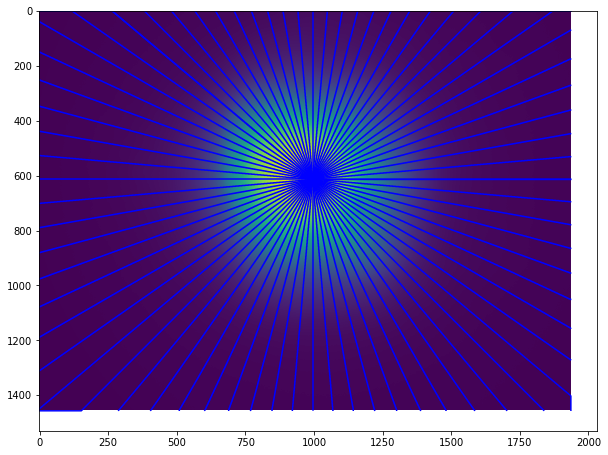

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(images.others[first_image].data)
plt.plot(images.others[first_image].slices[0].xs + images.center[0], images.others[first_image].slices[0].yls, c='b')
plt.plot(images.others[first_image].slices[140].xs + images.center[0], images.others[first_image].slices[140].yls, c='b')

angle = 5
for i in range(int(360 / angle)):
    v = i * angle
    try:
        plt.plot(images.others[first_image].slices[v].xs + images.center[0], images.others[first_image].slices[v].yus, c='b')
    except:
        plt.plot(images.others[first_image].slices[v].xus, images.others[first_image].slices[v].ys + images.center[1], c='b')
# plt.plot(images.others['100'].slices[95].xus, images.others['100'].slices[95].ys + images.center[1], c='r')

Using the slices a phi plot can be created

1300


D:\OneDrive - Danmarks Tekniske Universitet\OneDrive\Dokumenter\DTU\Terahertz\PaperExperiments\angle_analysis_tools.py:206: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(self.angles,np.array(self.slice_intensities)/np.max(self.slice_intensities))


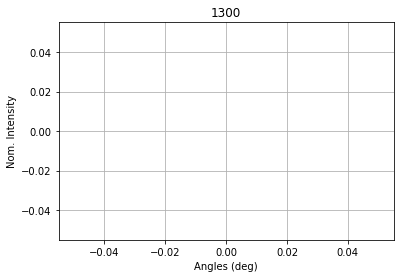

1320


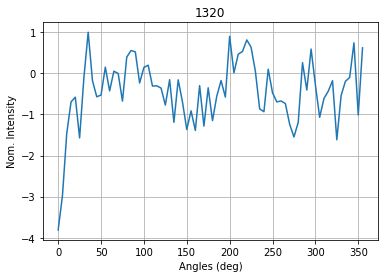

1340


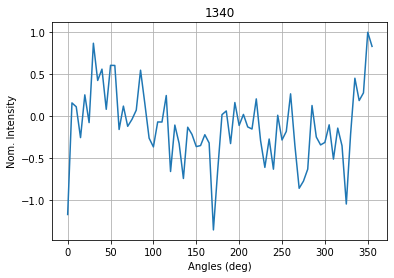

1360


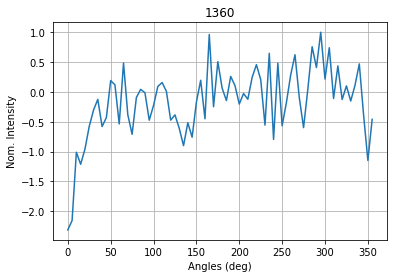

1380


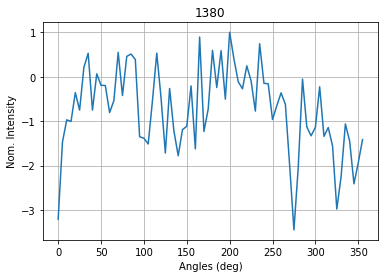

1400


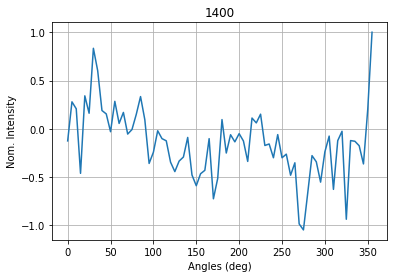

1420


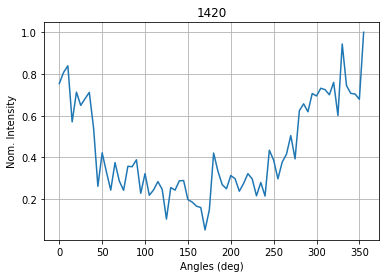

1440


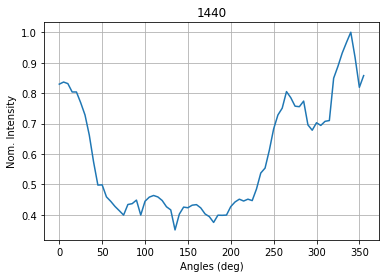

1460


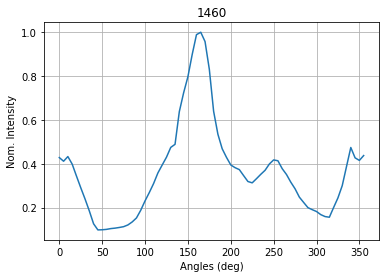

1480


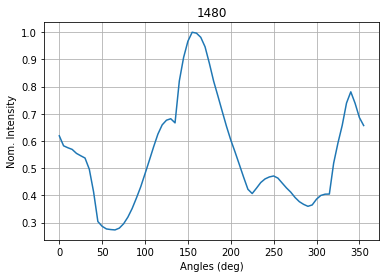

1500


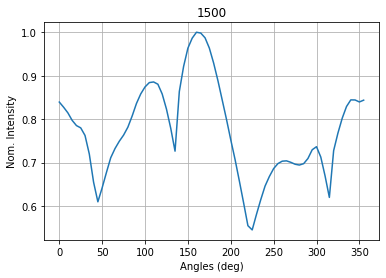

1520


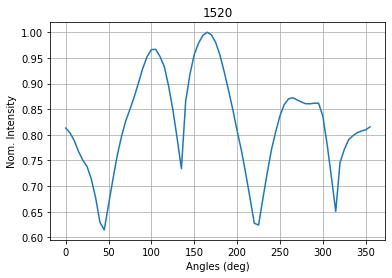

1540


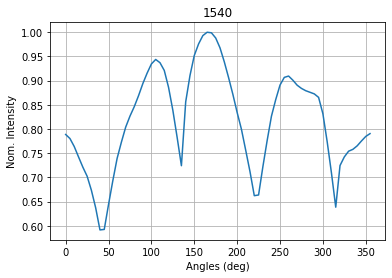

1560


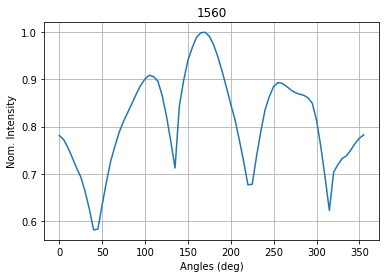

1580


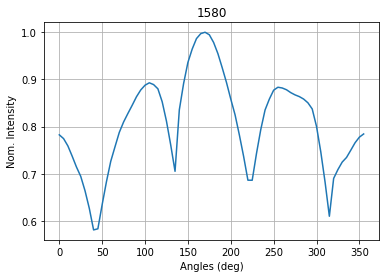

1600


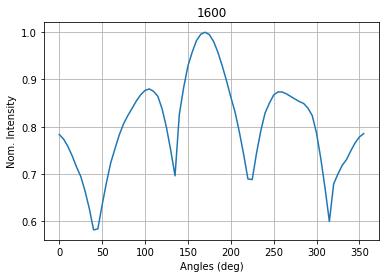

1620


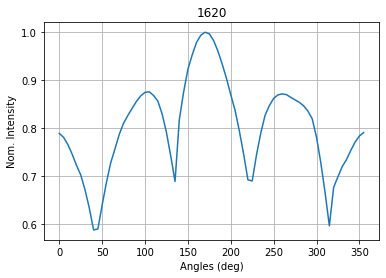

1640


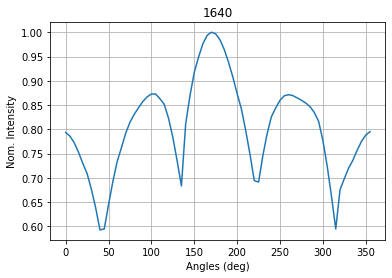

1660


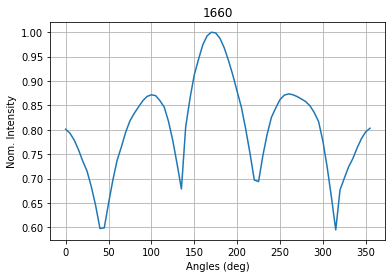

1680


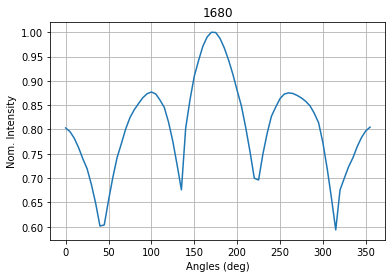

1700


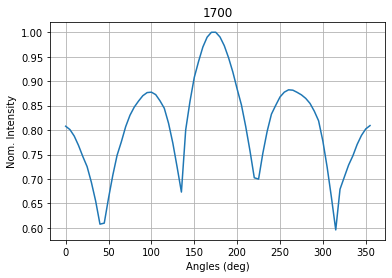

In [9]:
for i,im in enumerate(sorted(list(images.others))):
    if i == 0:
        continue
    angles, intensities = images.others[im].get_phi_dependence()
    print(im)
    images.others[im].plot_phi_dependence()

### Peak detection

Let's first take a look at at a slice intensity profile using the peak detection tool.

Depending on your images the visible peaks in the phi dependence plot might differ. Try selecting an angle where you are certain peaks exist.

Using the varialbes: Prominence (how peaky is it), width (minimum with of peak), distance (distance between peaks), try to isolate only the actual peaks.

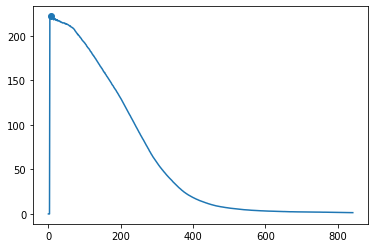

Peak indicies are:  [6]
The width of the peaks are:  [220.7181433]
And base positions:  [3] [842]


In [10]:
peaks, specifics = images.others[first_image].slices[235].get_peak_centers(plot=True, prominence=2.2, width=6, distance=5)
print("Peak indicies are: ",peaks)
print("The width of the peaks are: ", specifics["widths"])
print("And base positions: ", specifics["left_bases"], specifics["right_bases"])


Now let's try this with a second image with slightly different extraction voltage

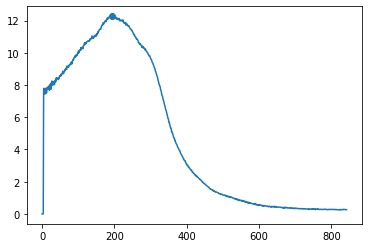

Peak indicies are:  [194]
The width of the peaks are:  [340.7033718]
And base positions:  [3] [825]


In [11]:
second_image = list(images.others)[1]
peaks2, specifics2 = images.others[second_image].slices[235].get_peak_centers(plot=True, prominence=2.2, width=6, distance=5)
print("Peak indicies are: ",peaks2)
print("The width of the peaks are: ", specifics2["widths"])
print("And base positions: ", specifics2["left_bases"], specifics2["right_bases"])


From this we can deduce the movement of the peaks and the width change of the peak

In [12]:
peak_movement = peaks2 - peaks
peak_width_change = specifics["widths"] - specifics2["widths"]
print("Peak shift: ", peak_movement)
print("Peak shape change: ", peak_width_change)

Peak shift:  [188]
Peak shape change:  [-119.9852285]


### Energy-Theta Analysis

A class has been created to analyse the change of the peaks, translating it into energy of emission and angle of emission

In [13]:
from emission_curves import EmissionCurve

The EmissionCurve class needs three things:
- The distance of first image peak from laser center
- The distance of second image peak from laser center
- The change in extraction voltage

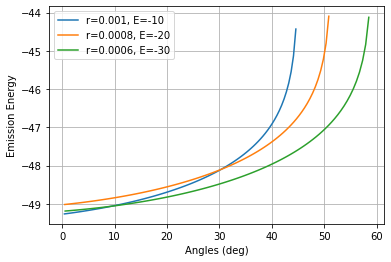

In [8]:
ptomu = 5e-3 / 723
ECs = [EmissionCurve(r=r, E=E) for r,E in zip([1e-3,0.8e-3, 0.6e-3],[-10,-20,-30])]

import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for ec in ECs:
    plt.plot(ec.angles * 180/np.pi, np.log(ec.curve), label=f"r={ec.r}, E={ec.E}")
plt.xlabel("Angles (deg)")
plt.ylabel("Emission Energy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib

In [3]:
EC.curve

array([-2.04339640e-15, -1.02224109e-15, -6.82080040e-16, -5.12168158e-16,
       -4.10356619e-16, -3.42595972e-16, -2.94293732e-16, -2.58153779e-16,
       -2.30122823e-16, -2.07768994e-16, -1.89544832e-16, -1.74418788e-16,
       -1.61676797e-16, -1.50808896e-16, -1.41441190e-16, -1.33293338e-16,
       -1.26151035e-16, -1.19847675e-16, -1.14251800e-16, -1.09258321e-16,
       -1.04782235e-16, -1.00754071e-16, -9.71165155e-17, -9.38218809e-17,
       -9.08301876e-17, -8.81076848e-17, -8.56257019e-17, -8.33597463e-17,
       -8.12887877e-17, -7.93946870e-17, -7.76617355e-17, -7.60762811e-17,
       -7.46264232e-17, -7.33017618e-17, -7.20931905e-17, -7.09927246e-17,
       -6.99933576e-17, -6.90889414e-17, -6.82740858e-17, -6.75440736e-17,
       -6.68947899e-17, -6.63226619e-17, -6.58246087e-17, -6.53979992e-17,
       -6.50406171e-17, -6.47506321e-17, -6.45265768e-17, -6.43673279e-17,
       -6.42720930e-17, -6.42404002e-17, -6.42720930e-17, -6.43673279e-17,
       -6.45265768e-17, -

In [4]:
np.log(2.04339640e-15)

NameError: name 'np' is not defined

In [ ]:
emission_angle = EC.angle
emission_energy = EC.E0

In [ ]:
print("Emission Angle in degrees: ", emission_angle * 180 / np.pi)
print("Emission Energy in eV: ", emission_energy)

Generate an angle dependence line for each picture, plot together
Use the lines to find intersections
All lines for the same THz power should intersect at the same spot

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
files = ["E:\\EmissionEnergy_Data\\Ampmeter\\08THz_100_40_s1_current_1\\current.csv","E:\\EmissionEnergy_Data\\Ampmeter\\09THz_100_40_s1_current_0\\current.csv"]

In [8]:
current = [pd.read_csv(file) for file in files]
positions = current[0].position.unique()
currents = [[curr.loc[curr.position == pos, "current"].mean() for pos in positions] for curr in current]
currents = [curr - curr[0] for curr in currents]
e_field = [(np.cos(pos*np.pi/180))**2 for pos in positions]

In [9]:
import os
os.getcwd()

'D:\\OneDrive - Danmarks Tekniske Universitet\\OneDrive\\Dokumenter\\DTU\\Terahertz\\PaperExperiments'

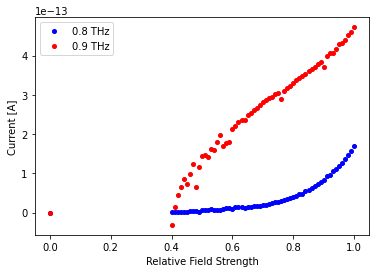

<ipython-input-13-5a3945575f22>:11: RuntimeWarning: invalid value encountered in log
  plt.plot(e_field[1:],np.log(currents[1][1:]), 'ro', label="0.9 THz", markersize=4)


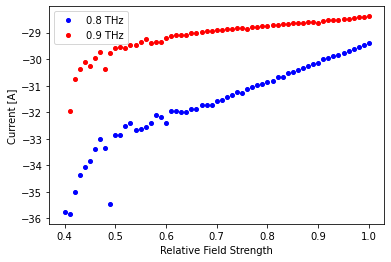

In [13]:
plt.figure()
plt.plot(e_field,currents[0], 'bo', label="0.8 THz", markersize=4)
plt.plot(e_field,currents[1], 'ro', label="0.9 THz", markersize=4)
plt.legend()
plt.xlabel("Relative Field Strength")
plt.ylabel("Current [A]")
plt.show()

plt.figure()
plt.plot(e_field[1:],np.log(currents[0][1:]), 'bo', label="0.8 THz", markersize=4)
plt.plot(e_field[1:],np.log(currents[1][1:]), 'ro', label="0.9 THz", markersize=4)
plt.legend()
plt.xlabel("Relative Field Strength")
plt.ylabel("Current [A]")
plt.show()

In [14]:
files = ["E:\\EmissionEnergy_Data\\PhosCur\\Currents\\08THz_2000V_90_40_100_s1\\voltage_and_currents.csv","E:\\EmissionEnergy_Data\\PhosCur\\Currents\\09THz_2000V_90_40_100_s1\\voltage_and_currents.csv"]

current = [pd.read_csv(file) for file in files]
positions = current[0].position.unique()
currents = [[curr.loc[curr.position == pos, "current3"].mean() for pos in positions] for curr in current]
currents = [curr - curr[0] for curr in currents]
e_field = [(np.cos(pos*np.pi/180))**2 for pos in positions]

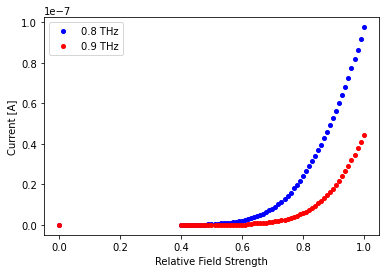

<ipython-input-15-5a3945575f22>:10: RuntimeWarning: invalid value encountered in log
  plt.plot(e_field[1:],np.log(currents[0][1:]), 'bo', label="0.8 THz", markersize=4)
<ipython-input-15-5a3945575f22>:11: RuntimeWarning: invalid value encountered in log
  plt.plot(e_field[1:],np.log(currents[1][1:]), 'ro', label="0.9 THz", markersize=4)


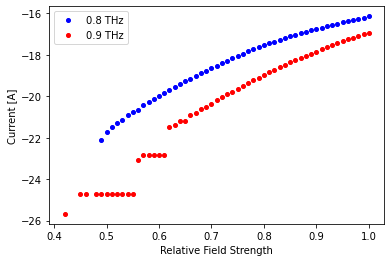

In [15]:
plt.figure()
plt.plot(e_field,currents[0], 'bo', label="0.8 THz", markersize=4)
plt.plot(e_field,currents[1], 'ro', label="0.9 THz", markersize=4)
plt.legend()
plt.xlabel("Relative Field Strength")
plt.ylabel("Current [A]")
plt.show()

plt.figure()
plt.plot(e_field[1:],np.log(currents[0][1:]), 'bo', label="0.8 THz", markersize=4)
plt.plot(e_field[1:],np.log(currents[1][1:]), 'ro', label="0.9 THz", markersize=4)
plt.legend()
plt.xlabel("Relative Field Strength")
plt.ylabel("Current [A]")
plt.show()

In [66]:
currents[0] == currents[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
bins = 10
mi = 0
ma = 11
step = (ma - mi) / bins

t = np.round([mi + step/2] + [mi + i * step + step/2  for i in range(1,bins-2)] + [ma - step/2],2)

In [40]:
print(t[0])
print(t[1]-t[0])
print(t[2]-t[1])
print(ma - t[-1])

0.55
1.0999999999999999
1.1
0.5500000000000007


In [45]:
t

array([ 0.55,  1.65,  2.75,  3.85,  4.95,  6.05,  7.15,  8.25, 10.45])

In [8]:
arr = np.arange(1,10)

In [21]:
mask1 = arr > 4
mask2 = arr < 9

In [24]:
mask1 & mask2

array([False, False, False, False,  True,  True,  True,  True, False])

In [20]:
arr[mask2]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 5

In [12]:
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [1]:
from emission_curves import EmissionCurve, RangeSurface
ranges = RangeSurface(E=10)
ranges.get_r()

D:\OneDrive - Danmarks Tekniske Universitet\OneDrive\Dokumenter\DTU\Terahertz\PaperExperiments\emission_curves.py:197: RuntimeWarning:

invalid value encountered in sqrt



array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])